In [2]:
!pip install opencv-python matplotlib


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [112]:
import os
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf

In [113]:
data_dir = 'Data'
image_exts = ['jpg','jpeg','png','bmp']
image_exts

['jpg', 'jpeg', 'png', 'bmp']

Step - 1 : Load the data

In [114]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir , image_class)):
        image_path = os.path.join(data_dir , image_class , image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print("image not in ext list {} ".format(image_path))
                os.remove(image_path)
        except Expetion as e:
            print("Issue with image {}".format(image_path))

In [116]:
data = tf.keras.utils.image_dataset_from_directory('Data')  # converts the data into data set

Found 537 files belonging to 2 classes.


In [117]:
data_iterator = data.as_numpy_iterator()  #after data set created used for iteration

In [118]:
batch = data_iterator.next()
batch[0].max()   #class 1 is dogs  class 0 cats

255.0

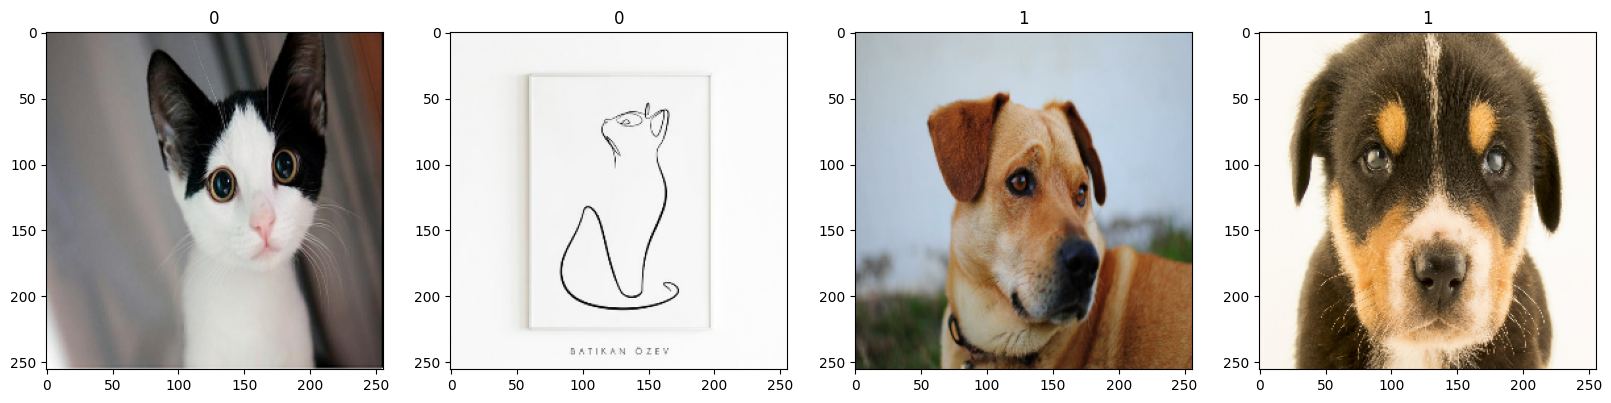

In [119]:
fig, ax = plt.subplots(ncols = 4 , figsize = (20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx]) 

step 2  Preprocess data

In [120]:
data = data.map(lambda x, y:(x/255 , y))  # x are images and y are labels 

In [121]:
scale_iterator = data.as_numpy_iterator()
batch = scale_iterator.next()
batch[0].max()

1.0

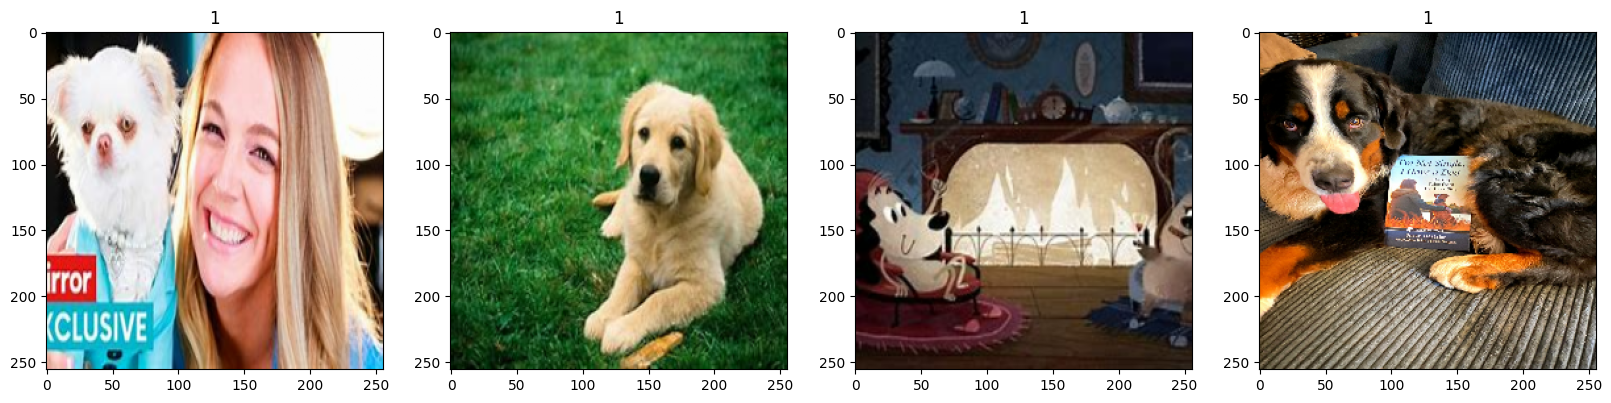

In [123]:
fig, ax = plt.subplots(ncols = 4 , figsize = (20,20))
for idx , img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx]) 

step 3 Spliting data

In [124]:
len(data) # size of dataset

17

In [125]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)+1
test_size = int(len(data)*0.1)+1

In [126]:
train = data.take(train_size)
val = data.skip(val_size)
test = data.skip(train_size + val_size).take(test_size)

step 4 Building deep learning model

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D , Dense , Flatten , Dropout

In [128]:
model = Sequential()

In [129]:
#
model.add(Conv2D(16 , (3,3) , 1,activation = 'relu' , input_shape = (256, 256 , 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32 , (3,3) , 1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16 , (3,3) , 1,activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256 , activation = 'relu'))
model.add(Dense(1 , activation = 'sigmoid'))

In [130]:
model.compile('adam' , loss = tf.losses.BinaryCrossentropy() , metrics = ['accuracy'])

In [131]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Train

In [132]:
logdir = 'logs'


In [133]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [134]:
hist = model.fit(train , epochs = 20 , validation_data = val , callbacks = [tensorboard_callback])

Epoch 1/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 796ms/step - accuracy: 0.5298 - loss: 0.8125 - val_accuracy: 0.6724 - val_loss: 0.6200
Epoch 2/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 730ms/step - accuracy: 0.6887 - loss: 0.6146 - val_accuracy: 0.6528 - val_loss: 0.6062
Epoch 3/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 8s 751ms/step - accuracy: 0.7051 - loss: 0.5775 - val_accuracy: 0.6846 - val_loss: 0.6149
Epoch 4/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 613ms/step - accuracy: 0.6905 - loss: 0.5986 - val_accuracy: 0.7115 - val_loss: 0.5417
Epoch 5/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 591ms/step - accuracy: 0.6797 - loss: 0.5514 - val_accuracy: 0.7922 - val_loss: 0.5735
Epoch 6/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 569ms/step - accuracy: 0.8180 - loss: 0.4960 - val_accuracy: 0.8386 - val_loss: 0.4610
Epoch 7/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 578ms/step - accuracy: 0.8404 - loss: 0.4488 - val_accuracy: 0.8362 - val_loss: 0.4628
Epoch 8/20
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 682ms/step - accuracy: 0.8804 - loss: 0.3997 - val_accuracy: 0

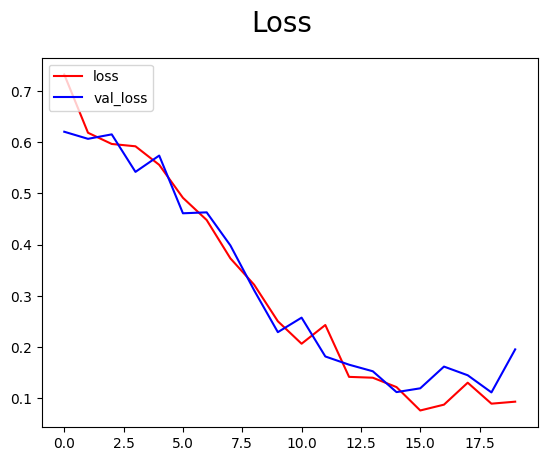

In [135]:
fig = plt.figure()
plt.plot(hist.history['loss'] , color='red', label = 'loss')
plt.plot(hist.history['val_loss'] , color='blue', label = 'val_loss')
plt.suptitle('Loss' , fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()


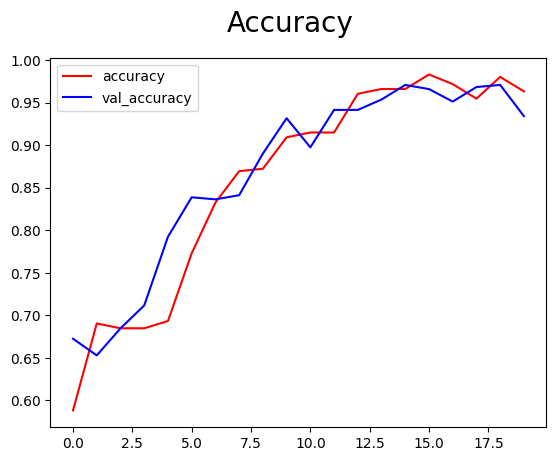

In [136]:
fig = plt.figure()
plt.plot(hist.history['accuracy'] , color='red', label = 'accuracy')
plt.plot(hist.history['val_accuracy'] , color='blue', label = 'val_accuracy')
plt.suptitle('Accuracy' , fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()


Evaluate

In [137]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [138]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [139]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


In [140]:
print("Precission.{}".format(pre.result().numpy()))
print("Recall.{}".format(re.result().numpy()))
print("Accuracy.{}".format(acc.result().numpy()))

Precission.0.9736841917037964
Recall.0.9024389982223511
Accuracy.0.9122806787490845


In [179]:
# path_dog = 'test/dogTest.jpeg'
path_cat = 'test/cat.jpg'
# imgDog = cv2.imread(path_dog)
imgCat = cv2.imread(path_cat)
# plt.imshow(img1)
# plt.imshow(img2)

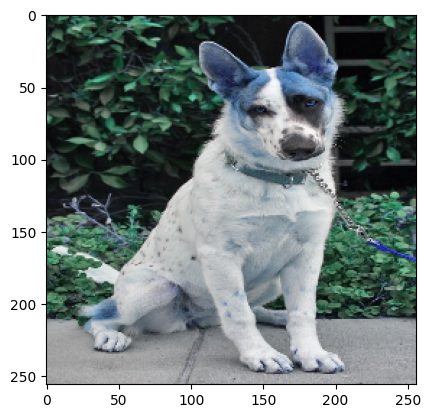

In [180]:
# resizeDog = tf.image.resize(imgDog , (256,256))
resizeCat = tf.image.resize(imgCat , (256,256))
plt.imshow(resizeCat.numpy().astype(int))
plt.show()

In [181]:
# yhat1 = model.predict(np.expand_dims(resizeDog/255 , 0))
yhat2 = model.predict(np.expand_dims(resizeCat/255 , 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [182]:
yhat2

array([[0.8410393]], dtype=float32)

In [183]:
if yhat2 > 0.5 :
    print("it is a Dog")
else:
    print("it is a cat")

it is a Dog


In [184]:
from tensorflow.keras.models import load_model


In [185]:
model.save(os.path.join('models' , 'Cats_And_Dogs_Classification.keras'))

In [186]:
new_model = load_model(os.path.join('models', 'Cats_And_Dogs_Classification.keras'))

In [187]:
predict = new_model.predict(np.expand_dims(resizeCat/255 , 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


In [188]:
if predict>0.5:
    print('dog')
else:
    print('cat')

dog
